In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df1=["Country","Region","Happiness Score","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]

In [5]:
df=df[df1].copy()

In [6]:
df

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,Middle East and Northern Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [7]:
new=df.rename(columns={'Country':'country','Region':'region','Happiness Score':'Happiness_score',
'Economy (GDP per Capita)':'economy','Family':'family',
'Health (Life Expectancy)':'Health','Freedom':'freedom',
'Trust (Government Corruption)':'Government_Corruption',
'Generosity':'generosity'})

In [8]:
new.head()

,country,region,Happiness_score,economy,family,Health,freedom,Government_Corruption,generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
new.isnull().sum()

country                  0
region                   0
Happiness_score          0
economy                  0
family                   0
Health                   0
freedom                  0
Government_Corruption    0
generosity               0
dtype: int64

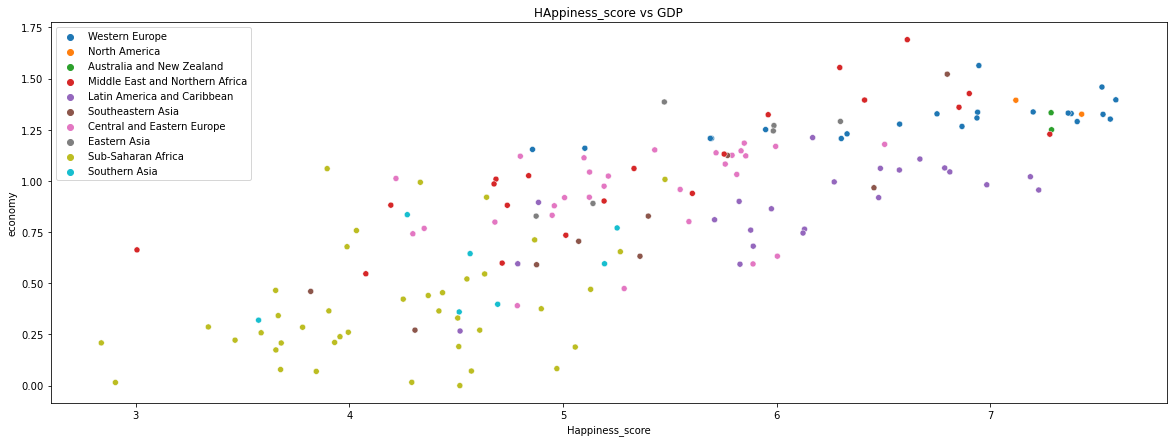

In [10]:
plt.rcParams['figure.figsize']=(20,7)
plt.title('HAppiness_score vs GDP')
sns.scatterplot(x=new.Happiness_score,y=new.economy,hue=new.region)

plt.legend(loc='upper left',fontsize='10')

In [11]:
gdp_reg=new.groupby('region')['economy'].sum()
gdp_reg

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: economy, dtype: float64

Text(0.5, 1.0, 'gdp by region')

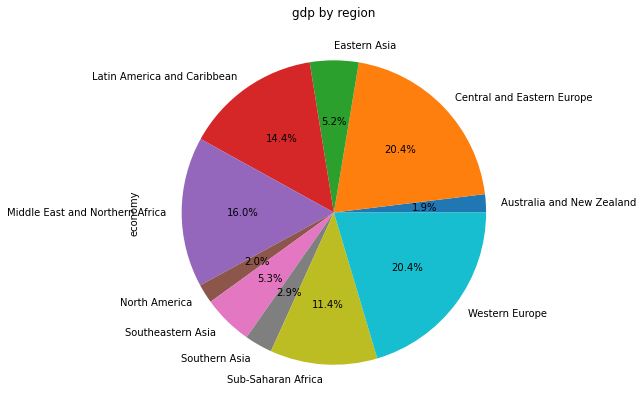

In [12]:
gdp_reg.plot.pie(autopct='%1.1f%%')
plt.title('gdp by region')

In [13]:
total_country=new.groupby('region')['country'].count()
total_country

region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: country, dtype: int64

In [14]:
corruption=new.groupby('region')['Government_Corruption'].mean()
corruption

region
Australia and New Zealand          0.392795
Central and Eastern Europe         0.086674
Eastern Asia                       0.127695
Latin America and Caribbean        0.117172
Middle East and Northern Africa    0.181702
North America                      0.244235
Southeastern Asia                  0.151276
Southern Asia                      0.102536
Sub-Saharan Africa                 0.123878
Western Europe                     0.231463
Name: Government_Corruption, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

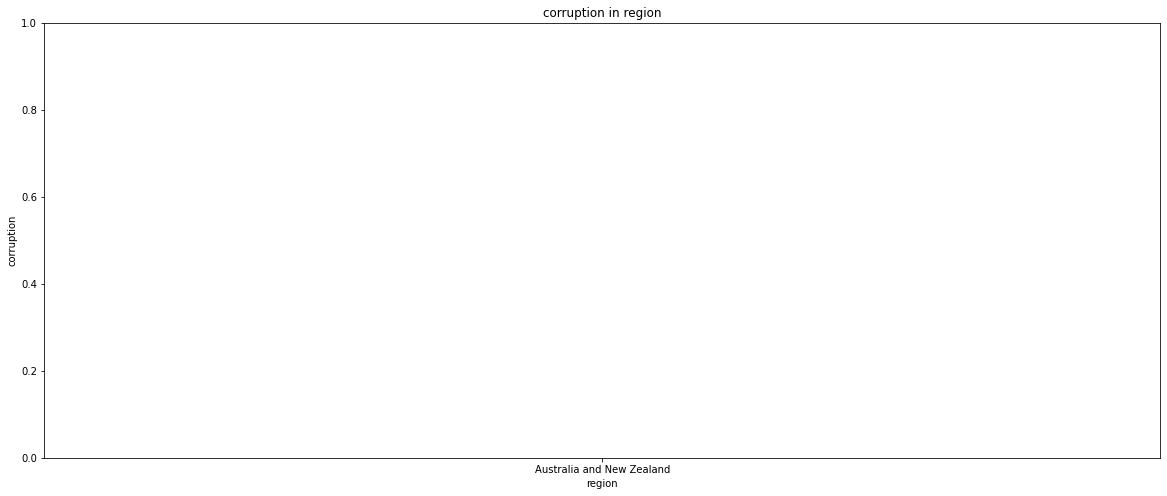

In [17]:
plt.rcParams['figure.figsize']=(20,8)
plt.title('corruption in region')
plt.xlabel('region')
plt.ylabel('corruption')
plt.bar(corruption.index,new.Government_Corruption)

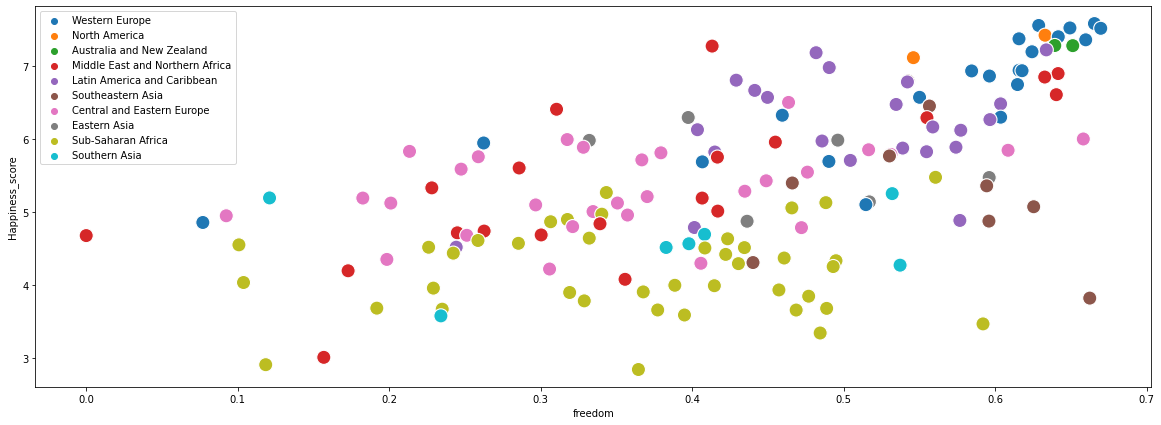

In [136]:
plt.rcParams['figure.figsize']=(20,7)
sns.scatterplot(x=new.freedom,y=new.Happiness_score,hue=new.region,s=200)

plt.legend(loc='upper left',fontsize='10')

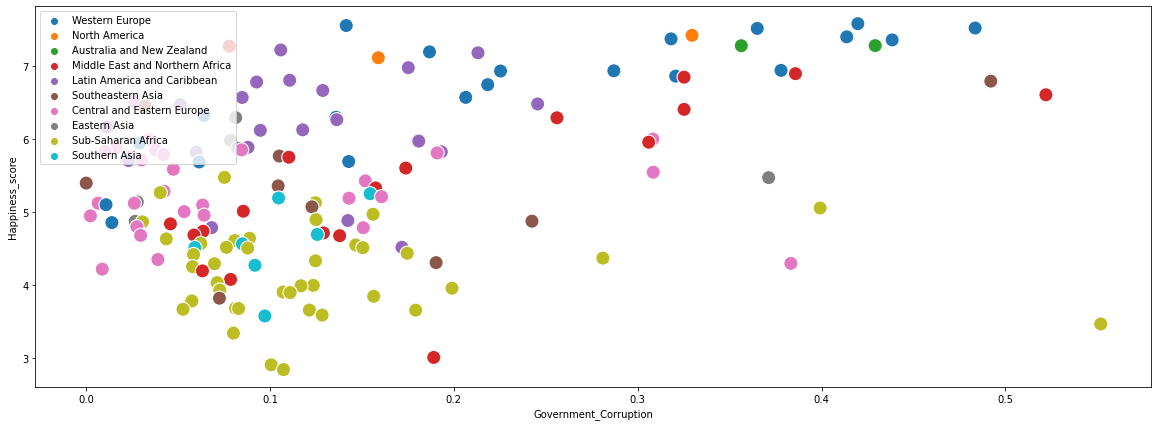

In [138]:
plt.rcParams['figure.figsize']=(20,7)
sns.scatterplot(x=new.Government_Corruption,y=new.Happiness_score,hue=new.region,s=200)

plt.legend(loc='upper left',fontsize='10')